# Production Technology

The dataset contains `N = 441` firms observed over `T = 12` years, 1967-1978. There variables are: 
* `lcap`: Log of capital stock, $k_{it}$ 
* `lemp`: log of employment, $\ell_{it}$ 
* `ldsa`: log of deflated sales, $y_{it}$
* `year`: the calendar year of the observation, `year` $ = 1967, ..., 1978$, 
* `firmid`: anonymized indicator variable for the firm, $i = 1, ..., N$, with $N=441$. 

In [583]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from numpy import linalg as la
from tabulate import tabulate

In [584]:
dat = pd.read_csv('firms.csv')

In [585]:
dat.sample(5)

,firmid,year,lcap,lemp,ldsa
315,27,1970,0.592978,0.364932,0.176091
328,28,1971,0.052670,-0.083528,-0.119153
3159,264,1970,0.686144,0.649490,0.297061
1643,137,1978,-0.447165,-0.704146,-0.897154
488,41,1975,2.807260,2.800643,2.989404


In [586]:
dat.year.unique()

array([1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978], dtype=int64)

# Descriptives

In [587]:
dat.describe()

,firmid,year,lcap,lemp,ldsa
count,5292.000000,5292.000000,5.292000e+03,5.292000e+03,5.292000e+03
mean,221.000000,1972.500000,-2.379856e-08,-3.248299e-08,-4.440666e-10
std,127.317437,3.452379,1.323176e+00,1.187237e+00,1.234902e+00
min,1.000000,1967.000000,-4.033590e+00,-3.382780e+00,-3.554090e+00
25%,111.000000,1969.750000,-9.251980e-01,-8.001460e-01,-9.190837e-01
50%,221.000000,1972.500000,-1.083100e-01,-1.147060e-01,-1.105555e-01
75%,331.000000,1975.250000,9.307292e-01,7.973080e-01,8.622255e-01
max,441.000000,1978.000000,4.103687e+00,3.371332e+00,3.913391e+00


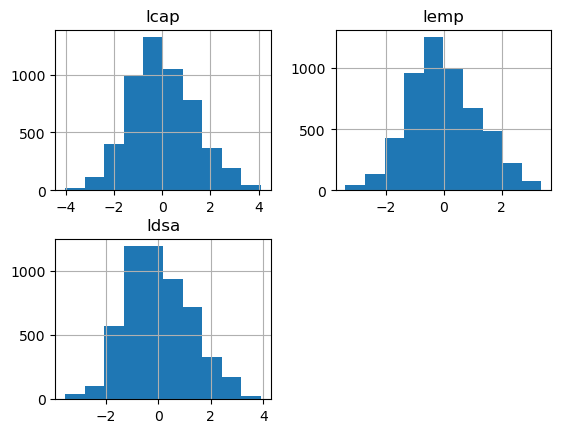

In [588]:
dat[['lcap','lemp','ldsa']].hist(); 

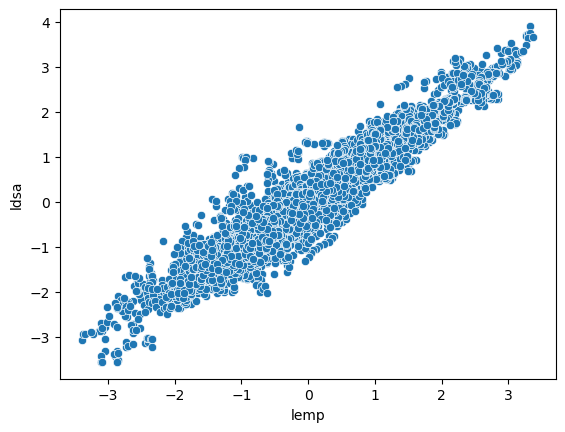

In [589]:
sns.scatterplot(x='lemp', y='ldsa', data=dat); 

# Converting data to numpy format 

In [590]:
dat.ldsa.values.shape

(5292,)

In [591]:
N = dat.firmid.unique().size
T = dat.year.unique().size
assert dat.shape[0] == N*T, f'Error: data is not a balanced panel'
print(f'Data has N={N} and T={T}')

Data has N=441 and T=12


Extract data from `pandas` to `numpy` arrays. 

In [592]:
y = dat.ldsa.values.reshape((N*T,1))

ones = np.ones((N*T,1))
l = dat.lemp.values.reshape((N*T,1))
k = dat.lcap.values.reshape((N*T,1))
X = np.hstack([ones, l, k])

dat.sample(5)

,firmid,year,lcap,lemp,ldsa
3149,263,1972,0.897831,1.524673,2.038424
198,17,1973,1.250751,1.186205,1.151395
3624,303,1967,-0.538117,-0.152706,-0.358471
2175,182,1970,0.041176,0.321898,0.128266
4640,387,1975,-0.501807,-0.092799,0.095654


Beta, kode mv

In [593]:

def ols_estimation(y,l,k):
    y=y
    l=l
    k=k

# Tjek at y,l,k har den rigtige form:

print(y.shape)
print(l.shape)
print(k.shape)

# Beta
b_hat = la.inv((X.T@X))@(X.T@y)
print(b_hat)


# residualer
residual = y - X@b_hat

# sigma
sigma = residual.T@residual/(N - 2) # har bare manuelt sagt N-2, ved ikke om det er forkert?

# Covariance (styr på flere)
cov = sigma*la.inv(X.T@X)

# SE
se = np.sqrt(cov.diagonal()).reshape(-1, 1)

# t-values
t_values = b_hat/se

# flatten??

residual=residual.flatten()
print(residual.shape)
outer = np.outer(residual,residual)
inner = np.inner(residual,residual)
matmul_inner = residual.T@residual
matmul_outer = residual@residual.T
print(inner.shape)
print(outer.shape)
print(matmul_inner.shape)
print(matmul_outer.shape)
matmul_outer



(5292, 1)
(5292, 1)
(5292, 1)
[[2.87790164e-08]
 [6.77826938e-01]
 [3.02759227e-01]]
(5292,)
()
(5292, 5292)
()
()


689.8793896545179

In [594]:
import LinearModels as lm
label_y=['y']
label_x=['k','l']
res = lm.estimate (y,X)
lm.print_table(
    (label_y, label_x), res, title="Pooled OLS", floatfmt='.4f'
)

Pooled OLS
Dependent variable: ['y']

      Beta      Se    t-values
--  ------  ------  ----------
k   0.0000  0.0050      0.0000
l   0.6778  0.0101     67.3273
R² = 0.914
σ² = 0.130
